In [1]:
import sys
import gym
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict, deque

In [2]:
env = gym.make('Blackjack-v0')

In [3]:
print(env.observation_space)
print(env.action_space)

Tuple(Discrete(32), Discrete(11), Discrete(2))
Discrete(2)


In [27]:
class Agent:
    
    def __init__(self, nA=2, alpha=0.05, gamma=1.0, epsilon=1.0, epsilon_decay=.9999, epsilon_min=.05):
        self.nA = nA
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        self.Q = defaultdict(lambda: np.zeros(nA))

    def select_action(self, state):
        probabilities = np.ones(self.nA) * self.epsilon / self.nA
        greedy_action = np.argmax(self.Q)
        probabilities[greedy_action] = 1- self.epsilon + (self.epsilon/self.nA)
        action = np.random.choice(np.arange(self.nA), p=probabilities)
        return action
    
    def update_q(self, state, action, reward, next_state):
        next_action = self.select_action(next_state)
        prev_q = self.Q[state][action]
        self.Q[state][action] = (1-self.alpha)*prev_q + self.alpha*(reward+self.gamma*np.max(self.Q[next_state]))
        
    def update_mc(self, states, actions, rewards):
        discounts = np.array([self.gamma**i for i in range(len(rewards)+1)])
        for i, state in enumerate(states):
            previous_Q = self.Q[state][actions[i]]
            self.Q[state][actions[i]] = previous_Q + self.alpha*(sum(rewards[i:]*discounts[:-(1+i)])-previous_Q)

In [5]:
def interact_mc(env, agent, num_episodes, window=100):
    won = 0
    lost = 0
    draws = 0
    
    for i_episode in range(1, num_episodes+1):
        ep_states, ep_actions, ep_rewards = [], [], []
        state = env.reset()
        while True:
            action = agent.select_action(state)
            next_state, reward, done, _ = env.step(action)
            ep_states.append(state)
            ep_actions.append(action)
            ep_rewards.append(reward)
            state = next_state
            
            if done:
                agent.update_mc(ep_states, ep_actions,ep_rewards)
                if sum(ep_rewards) >=1:
                    won +=1
                elif sum(ep_rewards) < 0:
                    lost += 1
                elif sum(ep_rewards) == 0:
                    draws += 1
                break
                
        if i_episode % window ==0:
            print('Episode {}|| won {}, drew {}, lost {} of games.'.format(i_episode, won, draws, lost))
            won = 0
            lost = 0
            draws = 0
            
    return agent.Q

In [30]:
def interact(env, agent, num_episodes, window=100):
    won = 0
    lost = 0
    draws = 0
    
    for i_episode in range(1, num_episodes+1):
        state = env.reset()
        while True:
            action = agent.select_action(state)
            next_state, reward, done, _ = env.step(action)
            agent.update_q(state, action, reward, next_state)
            state = next_state
            
            if done:
                if reward >=1:
                    won +=1
                elif reward < 0:
                    lost += 1
                elif reward == 0:
                    draws += 1
                break
                
        if i_episode % window ==0:
            print('Episode {}|| won {}, drew {}, lost {} of games.'.format(i_episode, won, draws, lost))
            won = 0
            lost = 0
            draws = 0
            
    return agent.Q

In [ ]:
agent = Agent()
Q_table = interact(env, agent, num_episodes=1000000)

Episode 100|| won 25, drew 4, lost 71 of games.
Episode 200|| won 26, drew 7, lost 67 of games.
Episode 300|| won 23, drew 3, lost 74 of games.
Episode 400|| won 31, drew 3, lost 66 of games.
Episode 500|| won 28, drew 5, lost 67 of games.
Episode 600|| won 25, drew 1, lost 74 of games.
Episode 700|| won 27, drew 0, lost 73 of games.
Episode 800|| won 33, drew 6, lost 61 of games.
Episode 900|| won 30, drew 2, lost 68 of games.
Episode 1000|| won 25, drew 3, lost 72 of games.
Episode 1100|| won 29, drew 2, lost 69 of games.
Episode 1200|| won 27, drew 5, lost 68 of games.
Episode 1300|| won 23, drew 7, lost 70 of games.
Episode 1400|| won 35, drew 2, lost 63 of games.
Episode 1500|| won 24, drew 4, lost 72 of games.
Episode 1600|| won 31, drew 4, lost 65 of games.
Episode 1700|| won 25, drew 6, lost 69 of games.
Episode 1800|| won 28, drew 5, lost 67 of games.
Episode 1900|| won 27, drew 5, lost 68 of games.
Episode 2000|| won 28, drew 2, lost 70 of games.
Episode 2100|| won 26, drew 3

Episode 17200|| won 32, drew 2, lost 66 of games.
Episode 17300|| won 30, drew 3, lost 67 of games.
Episode 17400|| won 22, drew 8, lost 70 of games.
Episode 17500|| won 23, drew 3, lost 74 of games.
Episode 17600|| won 27, drew 2, lost 71 of games.
Episode 17700|| won 28, drew 5, lost 67 of games.
Episode 17800|| won 31, drew 3, lost 66 of games.
Episode 17900|| won 26, drew 7, lost 67 of games.
Episode 18000|| won 23, drew 5, lost 72 of games.
Episode 18100|| won 31, drew 6, lost 63 of games.
Episode 18200|| won 32, drew 1, lost 67 of games.
Episode 18300|| won 32, drew 3, lost 65 of games.
Episode 18400|| won 31, drew 7, lost 62 of games.
Episode 18500|| won 21, drew 2, lost 77 of games.
Episode 18600|| won 27, drew 7, lost 66 of games.
Episode 18700|| won 36, drew 1, lost 63 of games.
Episode 18800|| won 28, drew 5, lost 67 of games.
Episode 18900|| won 34, drew 5, lost 61 of games.
Episode 19000|| won 23, drew 12, lost 65 of games.
Episode 19100|| won 26, drew 4, lost 70 of games.

Episode 34500|| won 25, drew 4, lost 71 of games.
Episode 34600|| won 25, drew 7, lost 68 of games.
Episode 34700|| won 34, drew 3, lost 63 of games.
Episode 34800|| won 34, drew 4, lost 62 of games.
Episode 34900|| won 28, drew 4, lost 68 of games.
Episode 35000|| won 25, drew 1, lost 74 of games.
Episode 35100|| won 29, drew 4, lost 67 of games.
Episode 35200|| won 29, drew 2, lost 69 of games.
Episode 35300|| won 21, drew 4, lost 75 of games.
Episode 35400|| won 27, drew 4, lost 69 of games.
Episode 35500|| won 27, drew 8, lost 65 of games.
Episode 35600|| won 26, drew 8, lost 66 of games.
Episode 35700|| won 24, drew 5, lost 71 of games.
Episode 35800|| won 32, drew 9, lost 59 of games.
Episode 35900|| won 30, drew 5, lost 65 of games.
Episode 36000|| won 36, drew 4, lost 60 of games.
Episode 36100|| won 28, drew 5, lost 67 of games.
Episode 36200|| won 37, drew 5, lost 58 of games.
Episode 36300|| won 25, drew 3, lost 72 of games.
Episode 36400|| won 29, drew 3, lost 68 of games.


Episode 52400|| won 24, drew 6, lost 70 of games.
Episode 52500|| won 26, drew 6, lost 68 of games.
Episode 52600|| won 28, drew 4, lost 68 of games.
Episode 52700|| won 32, drew 6, lost 62 of games.
Episode 52800|| won 32, drew 4, lost 64 of games.
Episode 52900|| won 34, drew 5, lost 61 of games.
Episode 53000|| won 34, drew 4, lost 62 of games.
Episode 53100|| won 25, drew 3, lost 72 of games.
Episode 53200|| won 35, drew 3, lost 62 of games.
Episode 53300|| won 28, drew 5, lost 67 of games.
Episode 53400|| won 34, drew 2, lost 64 of games.
Episode 53500|| won 26, drew 5, lost 69 of games.
Episode 53600|| won 34, drew 6, lost 60 of games.
Episode 53700|| won 31, drew 5, lost 64 of games.
Episode 53800|| won 26, drew 1, lost 73 of games.
Episode 53900|| won 24, drew 6, lost 70 of games.
Episode 54000|| won 20, drew 3, lost 77 of games.
Episode 54100|| won 21, drew 7, lost 72 of games.
Episode 54200|| won 26, drew 5, lost 69 of games.
Episode 54300|| won 24, drew 5, lost 71 of games.


Episode 69300|| won 29, drew 3, lost 68 of games.
Episode 69400|| won 31, drew 5, lost 64 of games.
Episode 69500|| won 26, drew 8, lost 66 of games.
Episode 69600|| won 25, drew 6, lost 69 of games.
Episode 69700|| won 28, drew 5, lost 67 of games.
Episode 69800|| won 23, drew 0, lost 77 of games.
Episode 69900|| won 30, drew 4, lost 66 of games.
Episode 70000|| won 19, drew 6, lost 75 of games.
Episode 70100|| won 24, drew 1, lost 75 of games.
Episode 70200|| won 30, drew 6, lost 64 of games.
Episode 70300|| won 32, drew 1, lost 67 of games.
Episode 70400|| won 30, drew 5, lost 65 of games.
Episode 70500|| won 33, drew 10, lost 57 of games.
Episode 70600|| won 25, drew 5, lost 70 of games.
Episode 70700|| won 19, drew 3, lost 78 of games.
Episode 70800|| won 30, drew 5, lost 65 of games.
Episode 70900|| won 41, drew 6, lost 53 of games.
Episode 71000|| won 23, drew 4, lost 73 of games.
Episode 71100|| won 23, drew 3, lost 74 of games.
Episode 71200|| won 30, drew 4, lost 66 of games.

Episode 86300|| won 27, drew 2, lost 71 of games.
Episode 86400|| won 32, drew 2, lost 66 of games.
Episode 86500|| won 35, drew 4, lost 61 of games.
Episode 86600|| won 30, drew 4, lost 66 of games.
Episode 86700|| won 29, drew 3, lost 68 of games.
Episode 86800|| won 33, drew 3, lost 64 of games.
Episode 86900|| won 31, drew 5, lost 64 of games.
Episode 87000|| won 33, drew 3, lost 64 of games.
Episode 87100|| won 30, drew 3, lost 67 of games.
Episode 87200|| won 32, drew 8, lost 60 of games.
Episode 87300|| won 36, drew 5, lost 59 of games.
Episode 87400|| won 36, drew 3, lost 61 of games.
Episode 87500|| won 25, drew 4, lost 71 of games.
Episode 87600|| won 25, drew 5, lost 70 of games.
Episode 87700|| won 35, drew 6, lost 59 of games.
Episode 87800|| won 29, drew 1, lost 70 of games.
Episode 87900|| won 22, drew 3, lost 75 of games.
Episode 88000|| won 22, drew 4, lost 74 of games.
Episode 88100|| won 38, drew 3, lost 59 of games.
Episode 88200|| won 23, drew 3, lost 74 of games.


Episode 103900|| won 27, drew 8, lost 65 of games.
Episode 104000|| won 28, drew 6, lost 66 of games.
Episode 104100|| won 28, drew 2, lost 70 of games.
Episode 104200|| won 33, drew 2, lost 65 of games.
Episode 104300|| won 32, drew 3, lost 65 of games.
Episode 104400|| won 35, drew 6, lost 59 of games.
Episode 104500|| won 28, drew 4, lost 68 of games.
Episode 104600|| won 29, drew 2, lost 69 of games.
Episode 104700|| won 25, drew 5, lost 70 of games.
Episode 104800|| won 36, drew 3, lost 61 of games.
Episode 104900|| won 19, drew 5, lost 76 of games.
Episode 105000|| won 26, drew 5, lost 69 of games.
Episode 105100|| won 20, drew 7, lost 73 of games.
Episode 105200|| won 28, drew 3, lost 69 of games.
Episode 105300|| won 31, drew 6, lost 63 of games.
Episode 105400|| won 30, drew 4, lost 66 of games.
Episode 105500|| won 30, drew 4, lost 66 of games.
Episode 105600|| won 26, drew 3, lost 71 of games.
Episode 105700|| won 35, drew 6, lost 59 of games.
Episode 105800|| won 24, drew 6

Episode 121000|| won 27, drew 3, lost 70 of games.
Episode 121100|| won 32, drew 4, lost 64 of games.
Episode 121200|| won 27, drew 3, lost 70 of games.
Episode 121300|| won 28, drew 5, lost 67 of games.
Episode 121400|| won 26, drew 2, lost 72 of games.
Episode 121500|| won 23, drew 5, lost 72 of games.
Episode 121600|| won 27, drew 5, lost 68 of games.
Episode 121700|| won 27, drew 1, lost 72 of games.
Episode 121800|| won 22, drew 7, lost 71 of games.
Episode 121900|| won 25, drew 6, lost 69 of games.
Episode 122000|| won 38, drew 2, lost 60 of games.
Episode 122100|| won 27, drew 3, lost 70 of games.
Episode 122200|| won 29, drew 1, lost 70 of games.
Episode 122300|| won 23, drew 5, lost 72 of games.
Episode 122400|| won 30, drew 3, lost 67 of games.
Episode 122500|| won 30, drew 2, lost 68 of games.
Episode 122600|| won 31, drew 4, lost 65 of games.
Episode 122700|| won 27, drew 3, lost 70 of games.
Episode 122800|| won 29, drew 6, lost 65 of games.
Episode 122900|| won 30, drew 4

Episode 138700|| won 27, drew 6, lost 67 of games.
Episode 138800|| won 28, drew 3, lost 69 of games.
Episode 138900|| won 23, drew 2, lost 75 of games.
Episode 139000|| won 26, drew 3, lost 71 of games.
Episode 139100|| won 25, drew 1, lost 74 of games.
Episode 139200|| won 25, drew 4, lost 71 of games.
Episode 139300|| won 30, drew 3, lost 67 of games.
Episode 139400|| won 21, drew 8, lost 71 of games.
Episode 139500|| won 28, drew 3, lost 69 of games.
Episode 139600|| won 28, drew 4, lost 68 of games.
Episode 139700|| won 30, drew 3, lost 67 of games.
Episode 139800|| won 28, drew 2, lost 70 of games.
Episode 139900|| won 20, drew 7, lost 73 of games.
Episode 140000|| won 33, drew 5, lost 62 of games.
Episode 140100|| won 28, drew 5, lost 67 of games.
Episode 140200|| won 26, drew 9, lost 65 of games.
Episode 140300|| won 31, drew 11, lost 58 of games.
Episode 140400|| won 36, drew 5, lost 59 of games.
Episode 140500|| won 27, drew 7, lost 66 of games.
Episode 140600|| won 28, drew 

Episode 156100|| won 27, drew 6, lost 67 of games.
Episode 156200|| won 22, drew 4, lost 74 of games.
Episode 156300|| won 28, drew 2, lost 70 of games.
Episode 156400|| won 34, drew 5, lost 61 of games.
Episode 156500|| won 27, drew 7, lost 66 of games.
Episode 156600|| won 22, drew 7, lost 71 of games.
Episode 156700|| won 28, drew 5, lost 67 of games.
Episode 156800|| won 26, drew 7, lost 67 of games.
Episode 156900|| won 25, drew 6, lost 69 of games.
Episode 157000|| won 32, drew 3, lost 65 of games.
Episode 157100|| won 27, drew 6, lost 67 of games.
Episode 157200|| won 28, drew 5, lost 67 of games.
Episode 157300|| won 33, drew 0, lost 67 of games.
Episode 157400|| won 24, drew 4, lost 72 of games.
Episode 157500|| won 35, drew 5, lost 60 of games.
Episode 157600|| won 28, drew 4, lost 68 of games.
Episode 157700|| won 31, drew 4, lost 65 of games.
Episode 157800|| won 27, drew 4, lost 69 of games.
Episode 157900|| won 30, drew 7, lost 63 of games.
Episode 158000|| won 31, drew 5

Episode 173800|| won 24, drew 3, lost 73 of games.
Episode 173900|| won 30, drew 4, lost 66 of games.
Episode 174000|| won 26, drew 2, lost 72 of games.
Episode 174100|| won 35, drew 6, lost 59 of games.
Episode 174200|| won 29, drew 2, lost 69 of games.
Episode 174300|| won 34, drew 1, lost 65 of games.
Episode 174400|| won 30, drew 7, lost 63 of games.
Episode 174500|| won 34, drew 2, lost 64 of games.
Episode 174600|| won 28, drew 1, lost 71 of games.
Episode 174700|| won 36, drew 7, lost 57 of games.
Episode 174800|| won 24, drew 5, lost 71 of games.
Episode 174900|| won 28, drew 5, lost 67 of games.
Episode 175000|| won 30, drew 4, lost 66 of games.
Episode 175100|| won 35, drew 4, lost 61 of games.
Episode 175200|| won 36, drew 2, lost 62 of games.
Episode 175300|| won 23, drew 2, lost 75 of games.
Episode 175400|| won 27, drew 8, lost 65 of games.
Episode 175500|| won 26, drew 3, lost 71 of games.
Episode 175600|| won 28, drew 6, lost 66 of games.
Episode 175700|| won 33, drew 0

Episode 190600|| won 24, drew 4, lost 72 of games.
Episode 190700|| won 24, drew 3, lost 73 of games.
Episode 190800|| won 27, drew 6, lost 67 of games.
Episode 190900|| won 26, drew 1, lost 73 of games.
Episode 191000|| won 27, drew 3, lost 70 of games.
Episode 191100|| won 32, drew 4, lost 64 of games.
Episode 191200|| won 26, drew 4, lost 70 of games.
Episode 191300|| won 34, drew 5, lost 61 of games.
Episode 191400|| won 29, drew 6, lost 65 of games.
Episode 191500|| won 21, drew 7, lost 72 of games.
Episode 191600|| won 29, drew 6, lost 65 of games.
Episode 191700|| won 28, drew 9, lost 63 of games.
Episode 191800|| won 31, drew 1, lost 68 of games.
Episode 191900|| won 28, drew 1, lost 71 of games.
Episode 192000|| won 33, drew 5, lost 62 of games.
Episode 192100|| won 32, drew 5, lost 63 of games.
Episode 192200|| won 31, drew 4, lost 65 of games.
Episode 192300|| won 36, drew 4, lost 60 of games.
Episode 192400|| won 27, drew 5, lost 68 of games.
Episode 192500|| won 21, drew 9

Episode 207600|| won 26, drew 2, lost 72 of games.
Episode 207700|| won 32, drew 7, lost 61 of games.
Episode 207800|| won 26, drew 1, lost 73 of games.
Episode 207900|| won 26, drew 4, lost 70 of games.
Episode 208000|| won 22, drew 3, lost 75 of games.
Episode 208100|| won 32, drew 5, lost 63 of games.
Episode 208200|| won 28, drew 4, lost 68 of games.
Episode 208300|| won 22, drew 8, lost 70 of games.
Episode 208400|| won 27, drew 7, lost 66 of games.
Episode 208500|| won 23, drew 6, lost 71 of games.
Episode 208600|| won 26, drew 4, lost 70 of games.
Episode 208700|| won 28, drew 2, lost 70 of games.
Episode 208800|| won 23, drew 5, lost 72 of games.
Episode 208900|| won 30, drew 5, lost 65 of games.
Episode 209000|| won 21, drew 8, lost 71 of games.
Episode 209100|| won 31, drew 0, lost 69 of games.
Episode 209200|| won 38, drew 3, lost 59 of games.
Episode 209300|| won 20, drew 5, lost 75 of games.
Episode 209400|| won 30, drew 2, lost 68 of games.
Episode 209500|| won 32, drew 3

Episode 224800|| won 27, drew 2, lost 71 of games.
Episode 224900|| won 30, drew 3, lost 67 of games.
Episode 225000|| won 24, drew 5, lost 71 of games.
Episode 225100|| won 26, drew 9, lost 65 of games.
Episode 225200|| won 32, drew 9, lost 59 of games.
Episode 225300|| won 31, drew 4, lost 65 of games.
Episode 225400|| won 28, drew 4, lost 68 of games.
Episode 225500|| won 29, drew 2, lost 69 of games.
Episode 225600|| won 25, drew 2, lost 73 of games.
Episode 225700|| won 32, drew 5, lost 63 of games.
Episode 225800|| won 29, drew 3, lost 68 of games.
Episode 225900|| won 24, drew 6, lost 70 of games.
Episode 226000|| won 28, drew 6, lost 66 of games.
Episode 226100|| won 34, drew 6, lost 60 of games.
Episode 226200|| won 33, drew 2, lost 65 of games.
Episode 226300|| won 24, drew 0, lost 76 of games.
Episode 226400|| won 29, drew 2, lost 69 of games.
Episode 226500|| won 22, drew 5, lost 73 of games.
Episode 226600|| won 21, drew 5, lost 74 of games.
Episode 226700|| won 28, drew 8

In [9]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

def plot_blackjack_values(V):

    def get_Z(x, y, usable_ace):
        if (x,y,usable_ace) in V:
            return V[x,y,usable_ace]
        else:
            return 0

    def get_figure(usable_ace, ax):
        x_range = np.arange(11, 22)
        y_range = np.arange(1, 11)
        X, Y = np.meshgrid(x_range, y_range)
        
        Z = np.array([get_Z(x,y,usable_ace) for x,y in zip(np.ravel(X), np.ravel(Y))]).reshape(X.shape)

        surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.coolwarm, vmin=-1.0, vmax=1.0)
        ax.set_xlabel('Player\'s Current Sum')
        ax.set_ylabel('Dealer\'s Showing Card')
        ax.set_zlabel('State Value')
        ax.view_init(ax.elev, -120)

    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(211, projection='3d')
    ax.set_title('Usable Ace')
    get_figure(True, ax)
    ax = fig.add_subplot(212, projection='3d')
    ax.set_title('No Usable Ace')
    get_figure(False, ax)
    plt.show()

def plot_policy(policy):

    def get_Z(x, y, usable_ace):
        if (x,y,usable_ace) in policy:
            return policy[x,y,usable_ace]
        else:
            return 1

    def get_figure(usable_ace, ax):
        x_range = np.arange(11, 22)
        y_range = np.arange(10, 0, -1)
        X, Y = np.meshgrid(x_range, y_range)
        Z = np.array([[get_Z(x,y,usable_ace) for x in x_range] for y in y_range])
        surf = ax.imshow(Z, cmap=plt.get_cmap('Pastel2', 2), vmin=0, vmax=1, extent=[10.5, 21.5, 0.5, 10.5])
        plt.xticks(x_range)
        plt.yticks(y_range)
        plt.gca().invert_yaxis()
        ax.set_xlabel('Player\'s Current Sum')
        ax.set_ylabel('Dealer\'s Showing Card')
        ax.grid(color='w', linestyle='-', linewidth=1)
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.1)
        cbar = plt.colorbar(surf, ticks=[0,1], cax=cax)
        cbar.ax.set_yticklabels(['0 (STICK)','1 (HIT)'])
            
    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot(121)
    ax.set_title('Usable Ace')
    get_figure(True, ax)
    ax = fig.add_subplot(122)
    ax.set_title('No Usable Ace')
    get_figure(False, ax)
    plt.show()

In [32]:
policy = dict((k,np.argmax(v)) for k, v in agent.Q.items())
V = dict((k,np.max(v)) for k, v in Q_table.items())

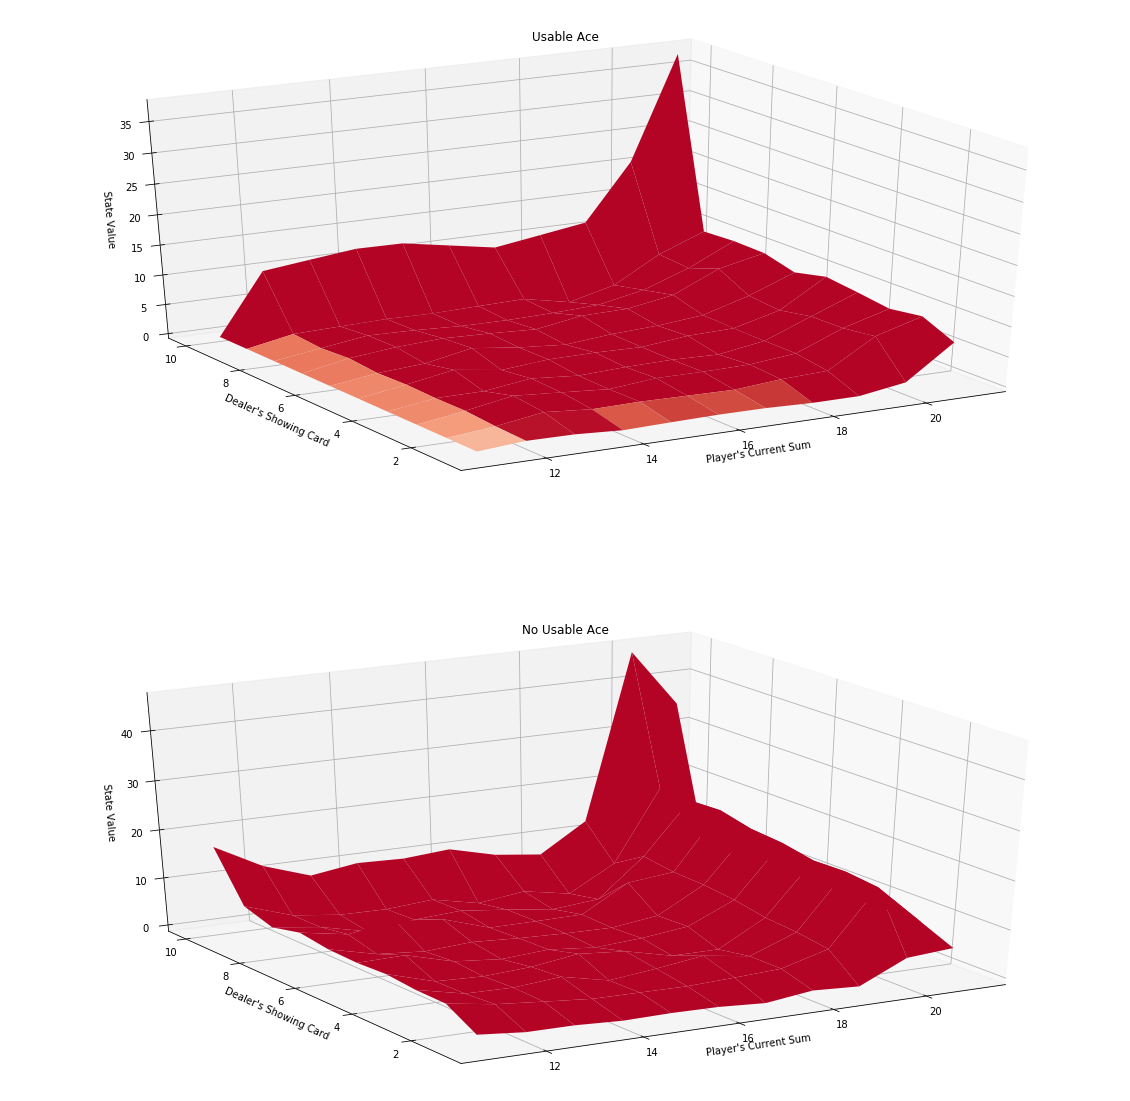

In [33]:
plot_blackjack_values(V)

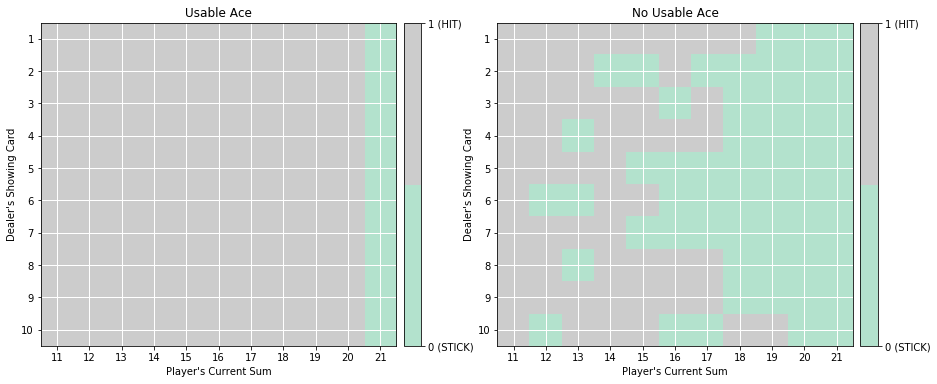

In [34]:
plot_policy(policy)